# **Statistical Analysis of Solar Coronal Loops**

This jupyter noteboopk focuses on the statistical analysis of solar coronal loops, which are prominent structures in the Sun's corona. Understanding the statistical features of coronal loops is crucial for characterizing their properties and behavior.

In [1]:
#matoplotlib, astropy
#import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import astropy.units as u
import patchworklib as pw
#sunpy
import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
#pandas, numpy
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns

<Figure size 72x72 with 0 Axes>

# Getting the cutout files from local folder

Here, the FITS subimages data obtained through manual sampling are utilized for analysis. These subimages capture regions containing full coronal loops, regions without loops, and regions with partial loops. The manual sampling process was conducted using the SelectionCutOut.py script, which allows for precise selection and extraction of regions of interest within the solar data.

For detailed instructions on how the manual sampling process was carried out, please refer to the manual of the SelectionCutOut.py script. This script facilitates interactive selection of specific regions within solar images, enabling researchers to accurately extract data corresponding to different types of coronal loop structures.

By leveraging manual sampling and the functionalities provided by the SelectionCutOut.py script, we ensure that only relevant regions containing coronal loops are included for further analysis. This approach enhances the accuracy and specificity of our analysis, enabling us to explore the statistical features of coronal loops and their significance in solar physics research.


In [12]:
 
loopFiles = glob.glob(r"Data/Loop/*.fits")
noLoopFiles = glob.glob(r"Data/NoLoop/*.fits")
#DarkNoLoopFiles = glob.glob(r"Data/DarkNoLoop/*.fits")
PartialLoopFiles = glob.glob(r"Data/PartialLoop/*.fits")

In [ ]:
loopNp=np.empty(shape=[0, 512*512], dtype=int)
noloopNp=np.empty(shape=[0, 512*512], dtype=int)
#DarkNoloopNp=np.empty(shape=[0, 512*512], dtype=int)
PartialLoopNp=np.empty(shape=[0, 512*512], dtype=int)

LoopSubMaps=sunpy.map.Map(loopFiles, sequence=True)
noLoopSubMaps=sunpy.map.Map(noLoopFiles, sequence=True)
#DarkNoLoopSubMaps=sunpy.map.Map(DarkNoLoopFiles, sequence=True)
PartialLoopSubMaps=sunpy.map.Map(PartialLoopFiles, sequence=True)

for i in range(len(loopFiles)):
    loopNp=np.concatenate((loopNp, [LoopSubMaps[i].data.flatten()]),axis=0)
    noloopNp=np.concatenate((noloopNp, [noLoopSubMaps[i].data.flatten()]),axis=0)
    #DarkNoloopNp=np.concatenate((DarkNoloopNp, [DarkNoLoopSubMaps[i].data.flatten()]),axis=0)


In [15]:
for i in range(len(PartialLoopFiles)):
    PartialLoopNp=np.concatenate((PartialLoopNp, [PartialLoopSubMaps[i].data.flatten()]),axis=0)

# Stat Analysis

The main objective of the analysis is to derive statistical features that characterize the properties of coronal loops. This involves computing various statistical measures including minimum, maximum, mean, trimmed mean, median, standard deviation, quartiles, and interquartile range (IQR). These statistical features offer valuable insights into the intensity, temperature, size, and other pertinent characteristics of coronal loops.

Upon computation, the calculated statistics are structured and stored in a pandas DataFrame, facilitating further investigation and analysis. This structured format enables easy manipulation and comparison of statistical measures across different types of coronal loops, aiding in the identification of patterns and trends within the data. Additionally, it allows for the integration of external datasets or additional analyses for a comprehensive understanding of coronal loop properties and behavior.

In [ ]:
# 1st version
# df=pd.DataFrame()
# df['ImageFile']=loopFiles+noLoopFiles+DarkNoLoopFiles
# df['LoopStatus']=np.concatenate(
#     (
#         np.ones(len(loopFiles), dtype = int), 
#         np.zeros(len(noLoopFiles), dtype = int),
#        #np.zeros(len(darkloopFiles), dtype = int)
#         ), axis=None
#     )
# df['LoopStatus']=df['LoopStatus'].map({1:'Loop',0:'NoLoop', 2:'DarkestNoLoop'})

### Calculating Summary Statistics

In [35]:
#partial loop version
df=pd.DataFrame()
df['ImageFile']=loopFiles+noLoopFiles+ PartialLoopFiles
df['LoopStatus']=np.concatenate(
    (
        np.ones(len(loopFiles), dtype = int), 
        2*np.ones(len(noLoopFiles), dtype = int),
        3*np.ones(len(PartialLoopFiles), dtype = int)
        ), axis=None
    )
df['LoopStatus']=df['LoopStatus'].map({1:'Loop',2:'PartialLoop', 3:'NoLoop'})

In [38]:
df["Min"]=np.concatenate((
    np.min(loopNp, axis=1),
    np.min(noloopNp,axis=1),
    np.min(PartialLoopNp,axis=1)))
df["Max"]=np.concatenate((
    np.max(loopNp, axis=1), 
    np.max(noloopNp,axis=1),
    np.max(PartialLoopNp,axis=1)
    ))
df["MeanVal"]=np.concatenate((
    np.mean(loopNp, axis=1), 
    np.mean(noloopNp,axis=1),
    np.mean(PartialLoopNp,axis=1)
    ))
df['TrimMean']=np.concatenate((
    stats.trim_mean(loopNp, .1, axis=1),
    stats.trim_mean(noloopNp, .1, axis=1),
    stats.trim_mean(PartialLoopNp, .1, axis=1),
    ))
df["MedVal"]=np.concatenate((
    np.median(loopNp, axis=1), 
    np.median(noloopNp,axis=1),
    np.median(PartialLoopNp,axis=1)
    ))
df['StandDiv']=np.concatenate((
    np.std(loopNp, axis=1), 
    np.std(noloopNp,axis=1),
    np.std(PartialLoopNp,axis=1)
    ))
df["Q1"]=np.concatenate((
    np.quantile(loopNp,.25, axis=1), 
    np.quantile(noloopNp,.25,axis=1),
    np.quantile(PartialLoopNp,.25,axis=1)
    ))
df["Q3"]=np.concatenate((
    np.quantile(loopNp,.75, axis=1),
    np.quantile(noloopNp,.75,axis=1),

    np.quantile(PartialLoopNp,.75,axis=1)
    ))
df["IQR"]=df["Q3"]-df["Q1"]

In [39]:
df.head()

,ImageFile,LoopStatus,Min,Max,MeanVal,TrimMean,MedVal,StandDiv,Q1,Q3,IQR
0,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,2,3756,97.944675,83.957104,79.0,98.052793,46.0,120.0,74.0
1,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,53,5948,594.199924,489.059776,420.0,543.965745,247.0,722.0,475.0
2,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,44,14533,871.642334,645.535038,536.0,1084.345722,258.0,1008.0,750.0
3,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,39,7183,579.443188,456.521276,338.0,615.062994,176.0,761.0,585.0
4,/Users/synergy/Documents/Research/AstroPySunPy...,Loop,98,7244,993.929207,864.720532,749.0,774.853925,438.0,1313.0,875.0


In [ ]:
# df.to_csv('LoopStatAnalysis.csv', index=False)

In [40]:
df.to_csv('PartalLoopStatAnalysis.csv', index=False)

## Stat Viz

### KDE plots

The provided code utilizes Kernel Density Estimation (KDE) plots to compare the distribution of summary statistics across different types of coronal loops. Subplots are generated for each summary statistic, allowing for a visual comparison of their distributions. This approach enables researchers to easily identify trends and variations in the data, facilitating the interpretation of statistical features.

By comparing the KDE plots of summary statistics, researchers can gain insights into how the properties of coronal loops differ between different categories. This visualization technique helps in identifying patterns and anomalies within the data, leading to a deeper understanding of coronal loop characteristics and behavior. Additionally, it enhances the communication of findings by providing a clear visual representation of the statistical analysis results.

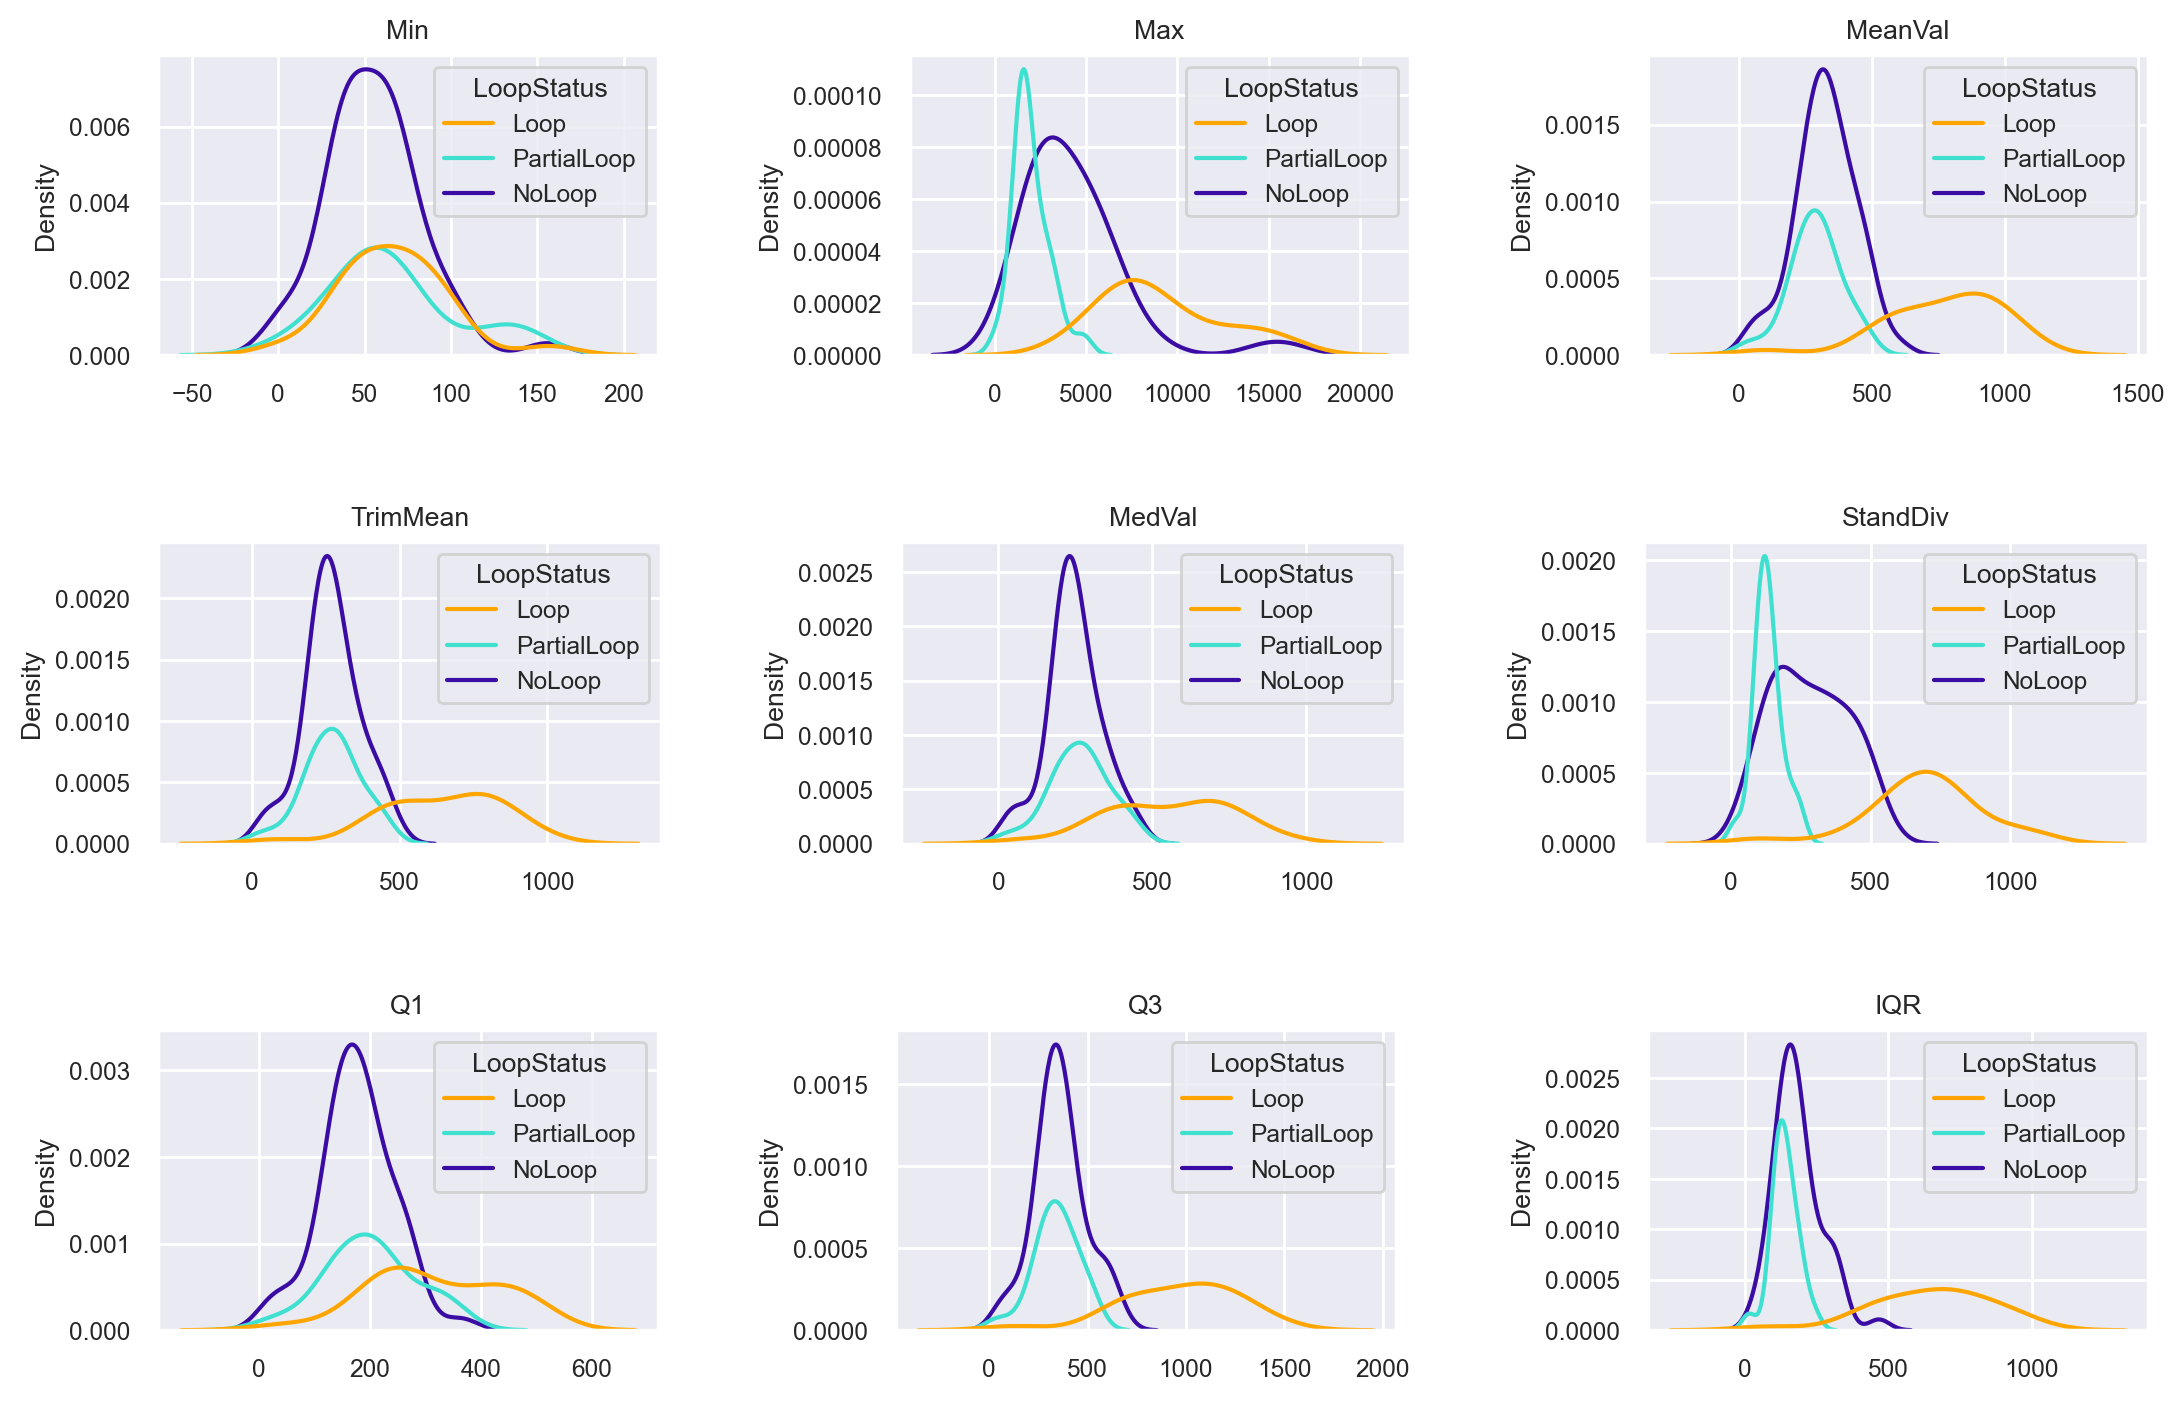

In [44]:

bx = []
sns.set(font_scale=0.8)

# Create subplots and plot density distributions
for i, col in enumerate(df.columns[2:]):
    # Create a new subplot with pw.Brick
    bx.append(pw.Brick(figsize=(2.5, 1.5)))

    # Create a distplot using seaborn
    sns.kdeplot(data=df, x=col, hue="LoopStatus",palette=myPal, ax=bx[i])

    # Set the title for each subplot
    bx[i].set_title(col)

    # Remove the x-axis label
    bx[i].set_xlabel(None)

# Combine the subplots
bxDist = (bx[0] | bx[1] | bx[2]) / (bx[3] | bx[4] | bx[5]) / (bx[6] | bx[7] | bx[8])

# Save the plot to a file (e.g., 'output.png')
bxDist.savefig('KDE.png')


# Hypothesis Testing

To assess the significance of differences between the summary statistics of images categorized as "NoLoop," "Loop," and "PartialLoop," hypothesis testing is conducted. The objective is to determine whether there are statistically significant differences in the summary statistics across these categories.
Two-sample t-test was used. This test compares the means of two independent samples to determine if they are significantly different from each other. It can be applied to compare summary statistics such as mean, median, or trimmed mean across different categories.

In [2]:
df=pd.read_csv('PartalLoopStatAnalysis.csv')

In [3]:
def SigTest(x,y):
    t_stat, p_val = stats.ttest_ind(x, y, equal_var = False, alternative="greater") 
    if (p_val<.01): 
        des="Significant"
    else:
        des="Not Significant"
    return [round(t_stat,6), round(p_val,6), des]

In [4]:
TestDf=pd.DataFrame(columns=[ 'ttest value', 'p-value', 'Decision'])
for cc in df.columns[2:]:
    res=SigTest(df[cc].loc[df['LoopStatus']=='Loop'], df[cc].loc[df['LoopStatus']=='NoLoop'])
    TestDf.loc[cc]=res


In [5]:
print(TestDf)

          ttest value   p-value         Decision
Min          1.519546  0.068242  Not Significant
Max          6.066459  0.000000      Significant
MeanVal      9.143097  0.000000      Significant
TrimMean     8.445261  0.000000      Significant
MedVal       7.185041  0.000000      Significant
StandDiv     8.925568  0.000000      Significant
Q1           5.436236  0.000004      Significant
Q3           9.405318  0.000000      Significant
IQR         10.437271  0.000000      Significant


In [6]:
t_stat, p_val = stats.ttest_ind(df['MeanVal'].loc[df['LoopStatus']=='Loop'], df['MeanVal'].loc[df['LoopStatus']=='NoLoop'], equal_var = False) 
print(t_stat, p_val)

9.14309691317697 5.900450500177023e-10


# Summary Statistics Quantiles

In this analysis, the focus is on extracting summary statistics quantiles to exact selection criteria for regions featuring full loops.

In [9]:
numerical_columns = ['Min', 'Max', 'MeanVal', 'TrimMean', 'MedVal', 'StandDiv', 'Q1', 'Q3', 'IQR']
quantiles_tables = {}
for var in numerical_columns:
    quantiles_tables[var] = df.groupby('LoopStatus')[var].describe(percentiles=[.25, .5, .75]).round(2)
    print('------------------------ \n', var,'\n', quantiles_tables[var])



------------------------ 
 Min 
              count   mean    std  min    25%   50%    75%    max
LoopStatus                                                      
Loop          24.0  66.67  31.36  2.0  45.50  69.0  83.50  157.0
NoLoop        53.0  55.34  27.80  0.0  38.00  55.0  67.00  156.0
PartialLoop   24.0  66.58  36.87  2.0  44.75  60.5  74.75  140.0
------------------------ 
 Max 
              count     mean      std     min      25%     50%       75%  \
LoopStatus                                                                
Loop          24.0  9094.25  3344.86  3756.0  7172.25  8062.0  10723.50   
NoLoop        53.0  4283.62  2936.15   560.0  2306.00  3787.0   5371.00   
PartialLoop   24.0  1979.79   979.23   216.0  1410.75  1690.0   2573.75   

                 max  
LoopStatus            
Loop         16161.0  
NoLoop       16175.0  
PartialLoop   4806.0  
------------------------ 
 MeanVal 
              count    mean     std    min     25%     50%     75%      max
LoopSt